# 🔧 Predictive Maintenance: Failure Classification

This project demonstrates predictive maintenance by classifying machine failures  

The project leverages a synthetic dataset designed to mimic real-world predictive maintenance scenarios.

## 🌟 Introduction
Predictive maintenance is a proactive approach that utilizes data analysis to predict when equipment failure might occur. By anticipating failures, timely maintenance can be performed, reducing downtime and saving costs.

---

## 📊 Dataset Overview
The synthetic dataset simulates real-world maintenance scenarios with:
- **10,000 records** and **14 features**
- **Target variable**:
  - `Failure_Type`: Specifies the type of failure (multiclass labels).
- **Features** include:
  - Continuous: Temperature, rotational speed, torque, tool wear, etc.
  - Categorical: Product quality, serial numbers, etc.

---

## 🚀 Project Workflow
1. **EDA & Data Preperations**:
   - Statistical Analysis
   - Visualizations
   - Handling missing values and outliers
   - Skewness Analysis
   - Correlation Analysis

2. **Feature Engineering & Normalization**:
   - Three new features were engineered
   - Ordinal and Standard normalization

3. **Model Training**:
   - Multiclass classification using algorithms like Decision Trees, Gradient Boosting, etc.

4. **Evaluation**:
   - Metrics: Accuracy, Precision, Recall, F1-Score, Support
   - Classification report

---

## 🛠️ Requirements
- Python 3.8 or above
- Libraries:
  - pandas
  - numpy
  - scikit-learn
  - matplotlib


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#!/bin/bash
!kaggle datasets download shivamb/machine-predictive-maintenance-classification

Dataset URL: https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification
License(s): CC0-1.0
100% 137k/137k [00:00<00:00, 355kB/s]
100% 137k/137k [00:00<00:00, 355kB/s]


In [3]:
!unzip machine-predictive-maintenance-classification.zip

Archive:  machine-predictive-maintenance-classification.zip
  inflating: predictive_maintenance.csv  


In [4]:
df = pd.read_csv(r"predictive_maintenance.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


## EDA

In [5]:
df.isnull().sum()


,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Target,0
Failure Type,0


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [7]:
df.describe()


,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [8]:
df['Target'].unique()


array([0, 1])

In [9]:
df['Failure Type'].unique()


array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

### Visualizations

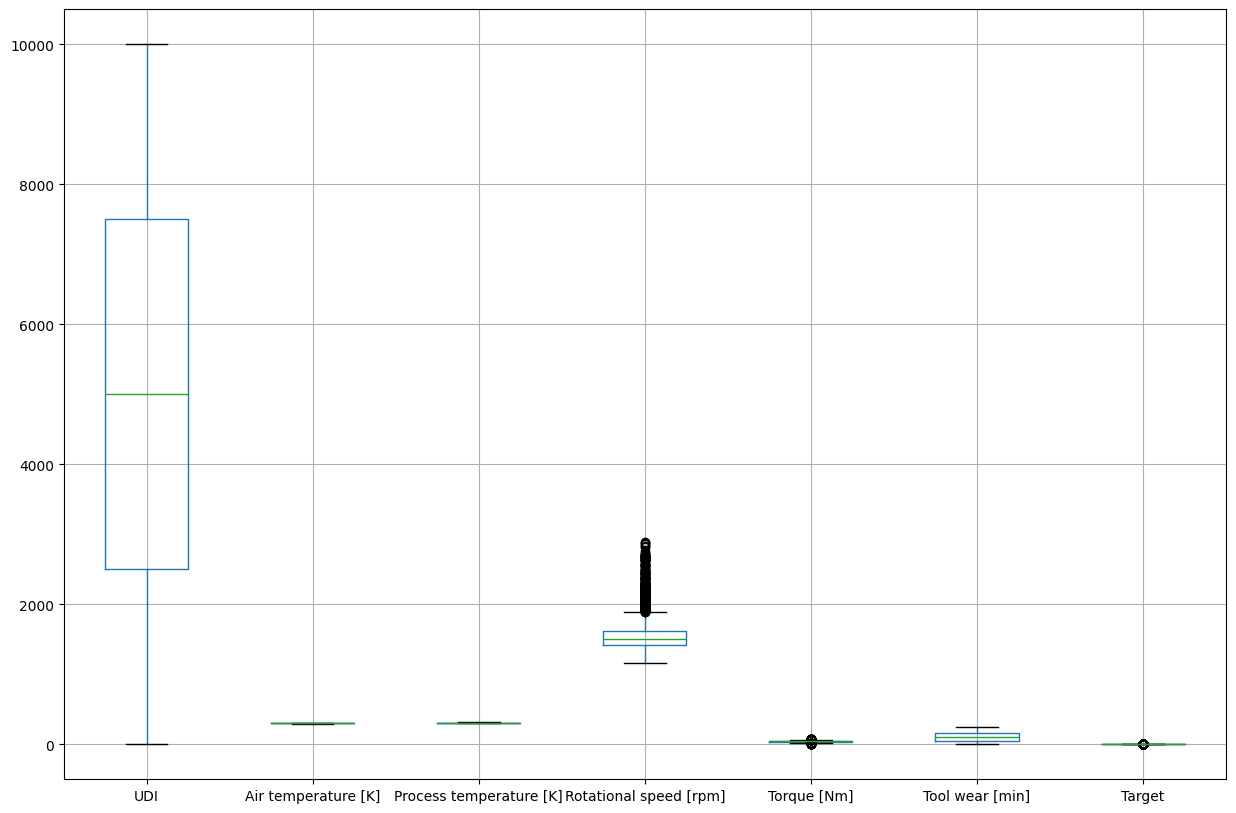

In [10]:
df.boxplot(figsize=(15,10))
plt.show()

### Checking outliers

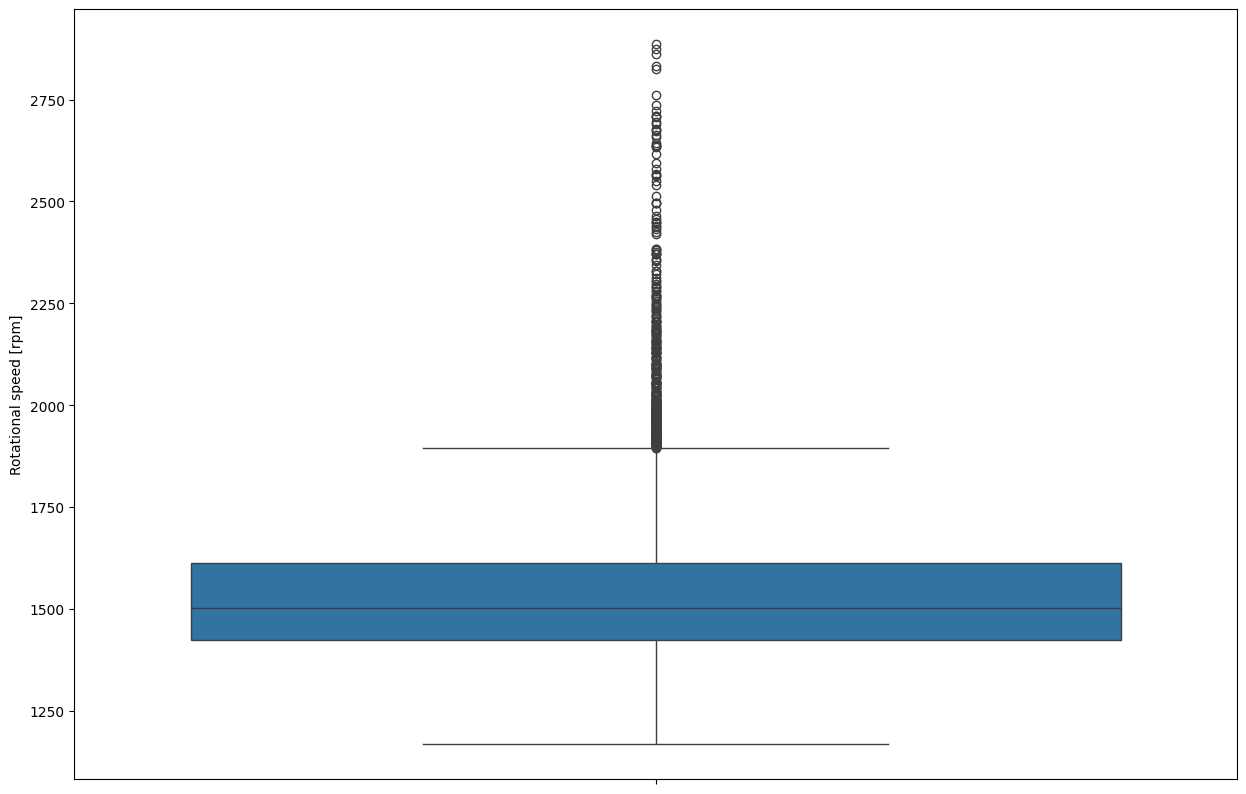

In [11]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df['Rotational speed [rpm]'])
plt.show()

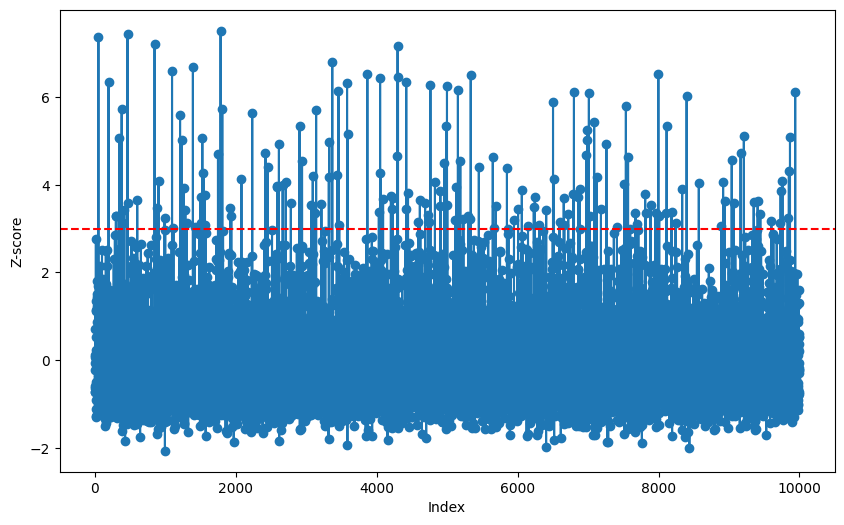

In [12]:
df['z_score'] = (df['Rotational speed [rpm]'] - df['Rotational speed [rpm]'].mean()) / df['Rotational speed [rpm]'].std()

plt.figure(figsize=(10, 6))
plt.plot(df['z_score'],marker='o')
plt.axhline(y=3, color='r', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Z-score')
plt.show()

### Checking Skewness

In [13]:
from scipy.stats import skew

skewness = skew(df['Rotational speed [rpm]'])
print(f'Skewness: {skewness}')

Skewness: 1.9928720166048546


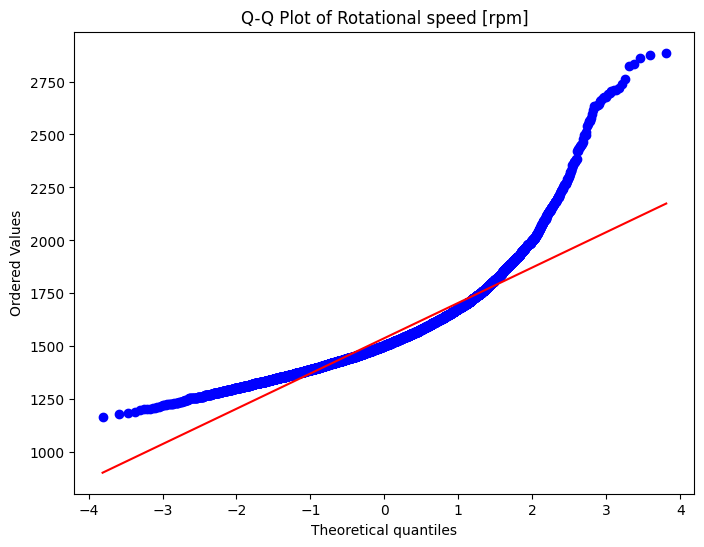

In [14]:
import scipy.stats as stats

plt.figure(figsize=(8, 6))
stats.probplot(df['Rotational speed [rpm]'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Rotational speed [rpm]')
plt.show()

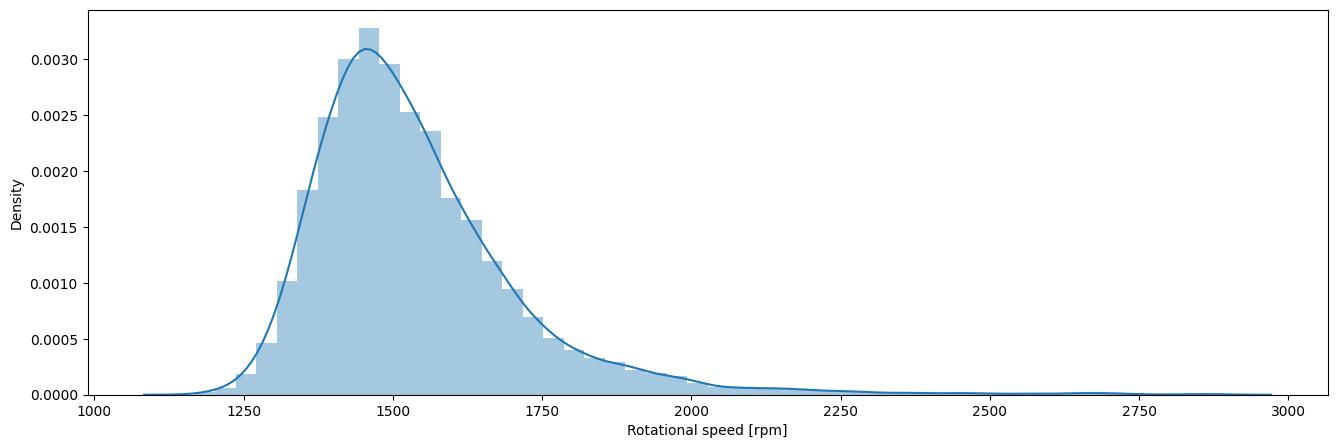

In [15]:
plt.figure(figsize=(16,5))
sns.distplot(df['Rotational speed [rpm]'])
plt.show()

In [16]:
print('Highest allowed',df['Rotational speed [rpm]'].mean() + 3*df['Rotational speed [rpm]'].std())
print('Lowest allowed',df['Rotational speed [rpm]'].mean() - 3*df['Rotational speed [rpm]'].std())

Highest allowed 2076.628387740279
Lowest allowed 1000.9238122597212


### Removing Outliers

In [17]:
q1 = df['Rotational speed [rpm]'].quantile(0.25)
q3 = df['Rotational speed [rpm]'].quantile(0.75)

iqr = q3 - q1

upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr


df = df[(df['Rotational speed [rpm]'] >= lower_limit) & (df['Rotational speed [rpm]'] <= upper_limit)]

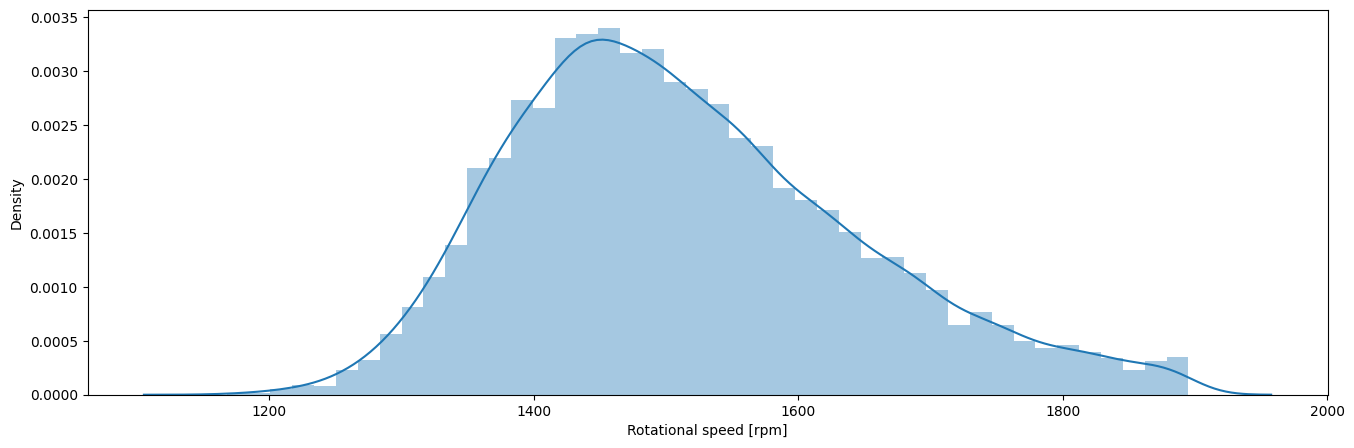

In [18]:
plt.figure(figsize=(16,5))
sns.distplot(df['Rotational speed [rpm]'])
plt.show()

In [19]:
df.drop(columns='z_score',inplace=True)
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


### Correlation

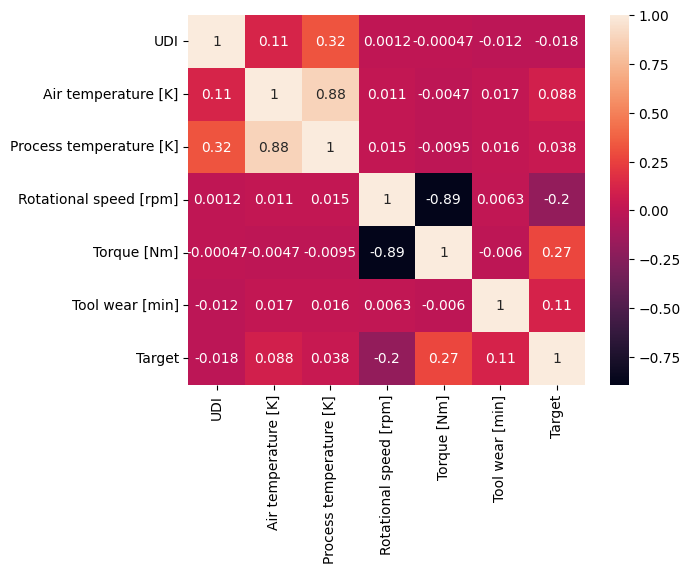

In [22]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)
plt.show()

## Feature Engineering

In [23]:
df['Temperature Difference'] = df['Process temperature [K]'] - df['Air temperature [K]']

df['Normalized Rotational Speed'] = df['Rotational speed [rpm]'] / df['Rotational speed [rpm]'].max()

df['High Torque Indicator'] = df['Torque [Nm]'].apply(lambda x: 1 if x > 45 else 0)

df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature Difference,Normalized Rotational Speed,High Torque Indicator
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,10.5,0.818470,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,10.5,0.743008,1
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,10.4,0.790501,1
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,10.4,0.756201,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,10.5,0.743008,0


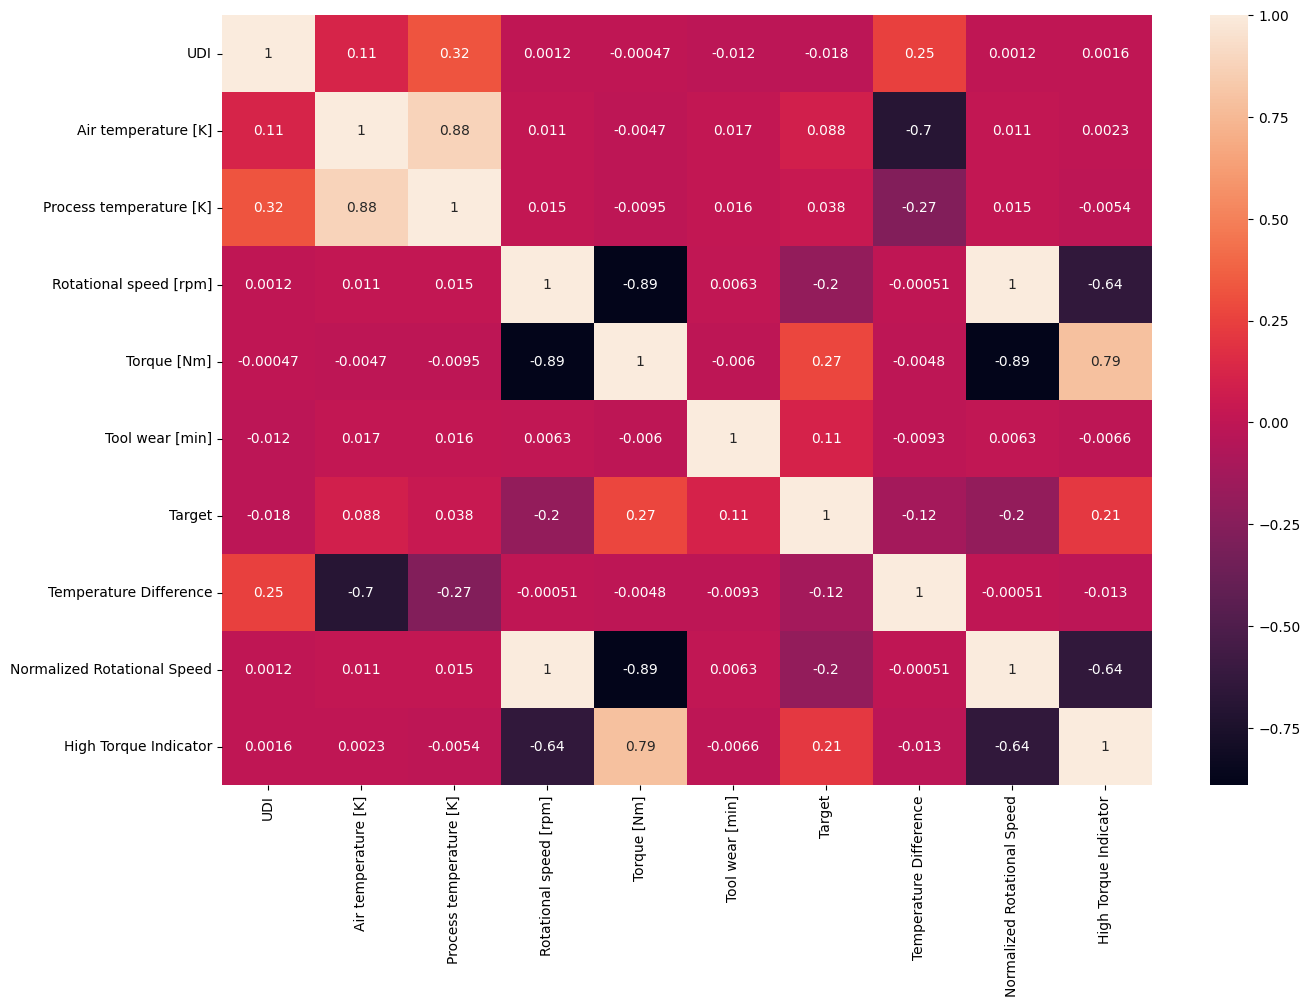

In [25]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)
plt.show()

### Dropping Unnecessary Columns

In [26]:
df.drop(columns=['UDI','Product ID','Target'],inplace=True)
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type,Temperature Difference,Normalized Rotational Speed,High Torque Indicator
0,M,298.1,308.6,1551,42.8,0,No Failure,10.5,0.818470,0
1,L,298.2,308.7,1408,46.3,3,No Failure,10.5,0.743008,1
2,L,298.1,308.5,1498,49.4,5,No Failure,10.4,0.790501,1
3,L,298.2,308.6,1433,39.5,7,No Failure,10.4,0.756201,0
4,L,298.2,308.7,1408,40.0,9,No Failure,10.5,0.743008,0


## Building Model

Here, stratify makes sure to split the target variable equally when performing train test split. This is useful when target class is imbalanced

In [27]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Failure Type')
y = df['Failure Type']

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=df['Failure Type'] ,test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7665, 9), (1917, 9), (7665,), (1917,))

### Preprocessing

In [28]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Define the numerical and categorical columns
num_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
            'Tool wear [min]', 'Temperature Difference', 'Normalized Rotational Speed', 'High Torque Indicator']
cat_cols = ['Type']

# Pipeline for categorical features
cat_transformer = Pipeline(steps=[
    ('label', OrdinalEncoder())
])

# Pipeline for numerical features
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine pipelines into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

# Apply transformations
X_train_proccessed = preprocessor.fit_transform(X_train)
X_test_proccessed = preprocessor.transform(X_test)

### Algorithms to consider

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
}

## Evaluation

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

model_names = []
accuracies = []

for name, clf in models.items():
    clf.fit(X_train_proccessed, y_train)
    score = clf.score(X_test_proccessed, y_test)  # Use X_test_processed and y_test for scoring
    model_names.append(name)
    accuracies.append(score)
    print(f"{name} accuracy: {score:.2f}")



Decision Tree accuracy: 0.98
Random Forest accuracy: 0.99
K-Nearest Neighbors accuracy: 0.97
Logistic Regression accuracy: 0.98
Support Vector Machine accuracy: 0.97


In [37]:
for model_name, model in models.items():
    print(100*'-')
    print(f"Evaluating {model_name}...")
    y_pred = model.predict(X_test_proccessed)  # Use X_test_processed for predictions
    print("Classification Report:")
    print(classification_report(y_test, y_pred))  # Compare predictions with y_test
    plt.show()

----------------------------------------------------------------------------------------------------
Evaluating Decision Tree...
Classification Report:
                          precision    recall  f1-score   support

Heat Dissipation Failure       1.00      0.95      0.98        22
              No Failure       0.99      0.99      0.99      1854
      Overstrain Failure       0.75      0.56      0.64        16
           Power Failure       0.82      0.69      0.75        13
         Random Failures       0.00      0.00      0.00         4
       Tool Wear Failure       0.00      0.00      0.00         8

                accuracy                           0.98      1917
               macro avg       0.59      0.53      0.56      1917
            weighted avg       0.98      0.98      0.98      1917

----------------------------------------------------------------------------------------------------
Evaluating Random Forest...
Classification Report:
                          precisi